In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(6)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0, 0.5, 'Combined Fuel Efficiency')

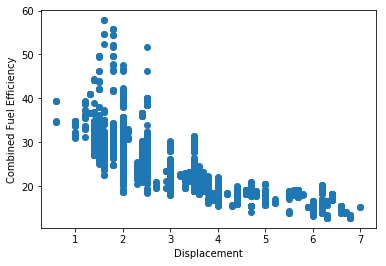

In [38]:
plt.scatter(data=fuel_econ, x='displ',y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency')

Text(0, 0.5, 'Combined Fuel Efficiency')

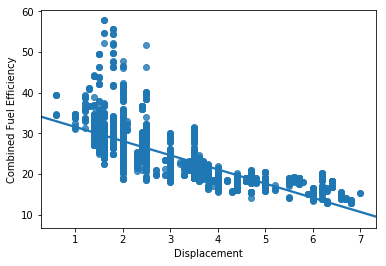

In [39]:
sns.regplot(data=fuel_econ, x='displ',y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency')

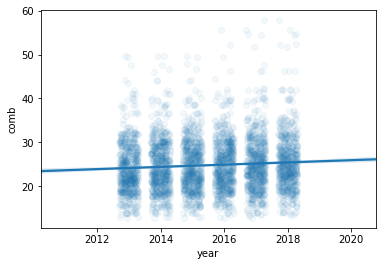

In [40]:
sns.regplot(data=fuel_econ, x='year',y='comb',x_jitter=0.3,
           scatter_kws={'alpha': 1/20});

Text(0, 0.5, 'Combined Fuel Efficiency')

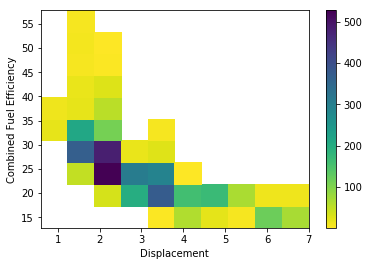

In [41]:
plt.hist2d(data=fuel_econ, x='displ',y='comb',cmin=0.5,cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency')

In [42]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

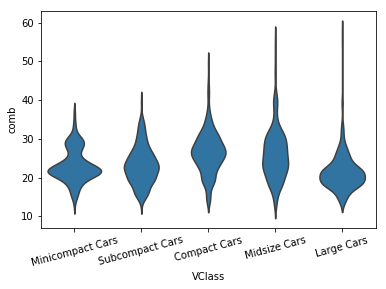

In [43]:
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb',color=base_color,inner=None)
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

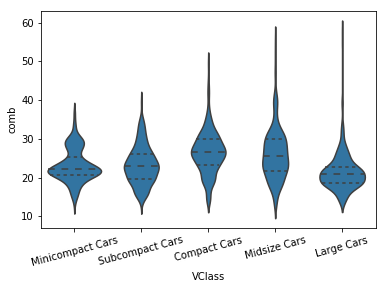

In [44]:
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb',color=base_color,inner='quartile')
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

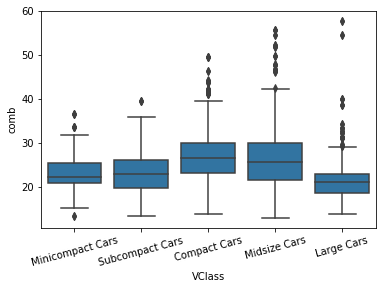

In [45]:
base_color = sns.color_palette()[0]
sns.boxplot(data=fuel_econ, x='VClass', y='comb',color=base_color)
plt.xticks(rotation=15)

In [46]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [47]:
fuel_econ['trans'].head()

0      Automatic (AM6)
1    Automatic (AM-S6)
2       Automatic (S6)
3       Automatic (S6)
4       Automatic (S6)
Name: trans, dtype: object

In [48]:
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts.pivot(index='VClass',columns='trans_type',values='count')

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

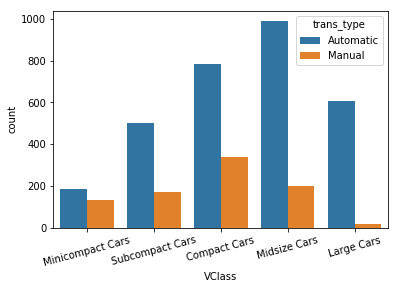

In [50]:
sns.countplot(data=fuel_econ,x='VClass',hue='trans_type')
plt.xticks(rotation=15)

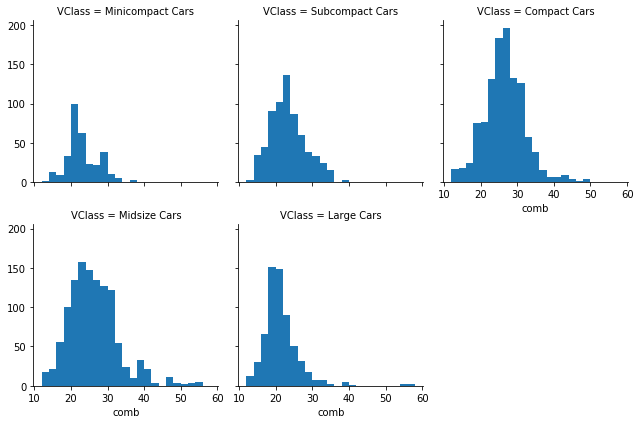

In [52]:
bins = np.arange(12,58+2,2)
g = sns.FacetGrid(data=fuel_econ,col='VClass',col_wrap=3)
g.map(plt.hist,'comb',bins=bins);

Text(0, 0.5, 'Average Fuel Efficiency')

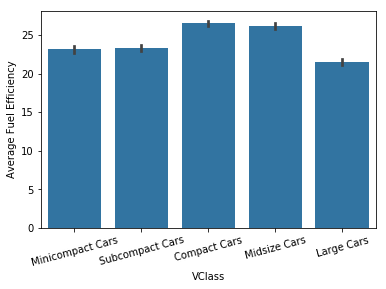

In [53]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Average Fuel Efficiency')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

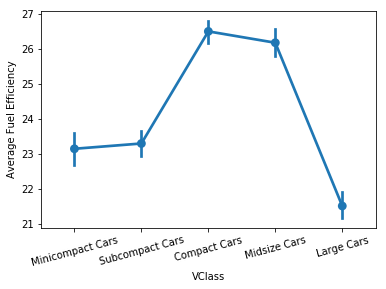

In [56]:
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb')
plt.ylabel('Average Fuel Efficiency')
plt.xticks(rotation=15)

In [67]:
bins_e = np.arange(0.6,7+0.2,0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e,include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

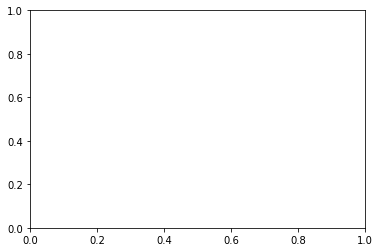

In [68]:
plt.errorbar(x = bins_c, y = comb_mean)
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency')